In [30]:
import torch
import matplotlib.pyplot as plt
import torch.utils.data as Data

In [31]:

class LinearModel(torch.nn.Module):
    def __init__(self):
        super(LinearModel, self).__init__()
        # (1,1)是指输入x和输出y的特征维度，这里数据集中的x和y的特征都是1维的
        # 该线性层需要学习的参数是w和b  获取w/b的方式分别是~linear.weight/linear.bias
        self.linear = torch.nn.Linear(1, 1)
 
    def forward(self, x):
        y_pred = self.linear(x)
        return y_pred

In [32]:
BATCH_SIZE = 3
 
epoch_list = []
loss_list = []
 
x_data = torch.tensor([[1.0],[2.0],[3.0],[4.0],[5.0],[6.0],[7.0],[8.0],[9.0]])
y_data = torch.tensor([[2.0],[4.0],[6.0],[8.0],[10.0],[12.0],[14.0],[16.0],[18.0]])
 
dataset = Data.TensorDataset(x_data,y_data)
 
loader = Data.DataLoader(  
    dataset=dataset,  
    batch_size=BATCH_SIZE,  
    shuffle=True,  
    num_workers=0  
)

In [33]:
model = LinearModel()
criterion = torch.nn.MSELoss(reduction = 'sum')
optimizer = torch.optim.SGD(model.parameters(), lr = 0.01)

for epoch in range(1000):  
    for iteration, (batch_x, batch_y) in enumerate(loader):  
        y_pred = model(batch_x) # forward
        loss = criterion(y_pred, batch_y) # backward
 
        optimizer.zero_grad() # the grad computer by .backward() will be accumulated. so before backward, remember set the grad to zero
        loss.backward() # backward: autograd，自动计算梯度
        optimizer.step() # update 参数，即更新w和b的值
    print("epoch: ",epoch, " loss: ",loss.item())
    epoch_list.append(epoch)
    loss_list.append(loss.data.item())
 
print('w = ', model.linear.weight.item())
print('b = ', model.linear.bias.item())
 
x_test = torch.tensor([[10.0]])
y_test = model(x_test)
print('y_pred = ', y_test.data)

epoch:  0  loss:  224.21926879882812
epoch:  1  loss:  361.9847106933594
epoch:  2  loss:  0.762850284576416
epoch:  3  loss:  0.05420415475964546
epoch:  4  loss:  0.06654370576143265
epoch:  5  loss:  0.6040636301040649
epoch:  6  loss:  0.03589341789484024
epoch:  7  loss:  0.043897468596696854
epoch:  8  loss:  0.33514198660850525
epoch:  9  loss:  0.13096025586128235
epoch:  10  loss:  0.16811738908290863
epoch:  11  loss:  0.6558281183242798
epoch:  12  loss:  0.0747515857219696
epoch:  13  loss:  0.024770380929112434
epoch:  14  loss:  0.02623988687992096
epoch:  15  loss:  0.049739062786102295
epoch:  16  loss:  0.03442568704485893
epoch:  17  loss:  0.15263736248016357
epoch:  18  loss:  0.02320106513798237
epoch:  19  loss:  0.009333294816315174
epoch:  20  loss:  0.02348942868411541
epoch:  21  loss:  0.019633185118436813
epoch:  22  loss:  0.019225139170885086
epoch:  23  loss:  0.10609443485736847
epoch:  24  loss:  0.04282597079873085
epoch:  25  loss:  0.0708593651652336

Text(0, 0.5, 'loss')

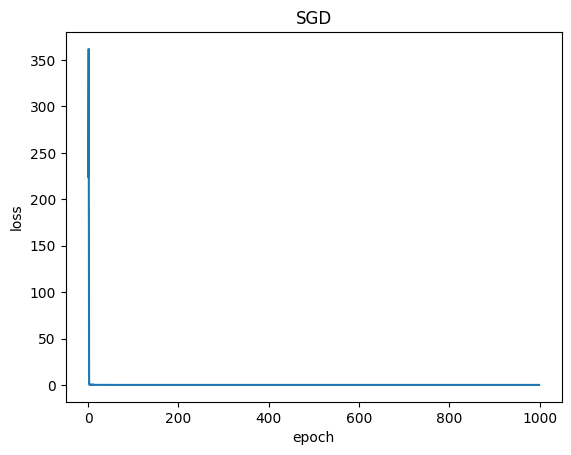

In [34]:
plt.plot(epoch_list,loss_list)
plt.title("SGD")
plt.xlabel("epoch")
plt.ylabel("loss")